In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

## Put baseline results into dictionary

In [54]:
with open("../results/nikResults/baselines.txt") as f:
    baselines = f.readlines()

In [55]:
baseResultLines = [b.strip() for b in baselines if b != "\n"]

In [56]:
baseResultLines

['./2019_05_26/baseline/k300/logr_doc2vec/accuracy.txt',
 '0.2775330396475771',
 './2019_05_26/baseline/k300/logr_word2vec/accuracy.txt',
 '0.40068081698037644',
 './2019_05_26/baseline/k20/logr_doc2vec/accuracy.txt',
 '0.24879855826992392',
 './2019_05_26/baseline/k20/logr_word2vec/accuracy.txt',
 '0.32689227072486987',
 './2019_05_26/baseline/k50/logr_doc2vec/accuracy.txt',
 '0.2617140568682419',
 './2019_05_26/baseline/k50/logr_word2vec/accuracy.txt',
 '0.35822987585102123',
 './2019_05_26/baseline/k100/logr_doc2vec/accuracy.txt',
 '0.2724269122947537',
 './2019_05_26/baseline/k100/logr_word2vec/accuracy.txt',
 '0.3800560672807369',
 './2019_05_26/baseline/k10/logr_doc2vec/accuracy.txt',
 '0.23317981577893473',
 './2019_05_26/baseline/k10/logr_word2vec/accuracy.txt',
 '0.3000600720865038']

In [57]:
baseDict={}
for i in range(0,len(baseResultLines)-1, 2):
    fullExpName = baseResultLines[i]
    startNumTopics = fullExpName.find("k")+1
    endNumTopics = fullExpName.find("/logr")
    numTopics = fullExpName[startNumTopics:endNumTopics]
    startMethod = fullExpName.find("/logr_")+6
    endMethodName = fullExpName.find("/accuracy")
    methodName = fullExpName[startMethod:endMethodName]
    if methodName not in baseDict:
        baseDict[methodName] = {}
    baseDict[methodName][numTopics] = baseResultLines[i+1]

In [58]:
baseDict

{'doc2vec': {'300': '0.2775330396475771',
  '20': '0.24879855826992392',
  '50': '0.2617140568682419',
  '100': '0.2724269122947537',
  '10': '0.23317981577893473'},
 'word2vec': {'300': '0.40068081698037644',
  '20': '0.32689227072486987',
  '50': '0.35822987585102123',
  '100': '0.3800560672807369',
  '10': '0.3000600720865038'}}

## Put neural method results into dictionary

In [59]:
with open("../results/nikResults/neural.txt") as f:
    neuralLines = f.readlines()
neuralLines = [n.strip() for n in neuralLines if n != "\n"]

In [60]:
neuralLines

['./2019_05_26/k300/scholar_supervised/accuracy.train.txt',
 '0.32455480311010787',
 './2019_05_26/k300/scholar_supervised/accuracy.test.txt',
 '0.3308610125765882',
 './2019_05_26/k300/logr_prodlda/accuracy.txt',
 '0.3627',
 './2019_05_26/k300/logr_scholar/accuracy.txt',
 '0.3478697749196141',
 './2019_05_26/k20/scholar_supervised/accuracy.train.txt',
 '0.3307750188111362',
 './2019_05_26/k20/scholar_supervised/accuracy.test.txt',
 '0.3232828119961303',
 './2019_05_26/k20/logr_prodlda/accuracy.txt',
 '0.3553',
 './2019_05_26/k20/logr_scholar/accuracy.txt',
 '0.31461012861736337',
 './2019_05_26/k50/scholar_supervised/accuracy.train.txt',
 '0.34431903686982696',
 './2019_05_26/k50/scholar_supervised/accuracy.test.txt',
 '0.3124798452112222',
 './2019_05_26/k50/logr_prodlda/accuracy.txt',
 '0.3684',
 './2019_05_26/k50/logr_scholar/accuracy.txt',
 '0.34375',
 './2019_05_26/k100/scholar_supervised/accuracy.train.txt',
 '0.3509907198394783',
 './2019_05_26/k100/scholar_supervised/accuracy.

In [61]:
for i in range(0,len(neuralLines)-1, 2):
    fullExpName = neuralLines[i]
    # Get num topics
    startNumTopics = fullExpName.find("k")+1
    endNumTopics = fullExpName.find("/",startNumTopics)
    numTopics = fullExpName[startNumTopics:endNumTopics]
    # Get method name
    startMethod = fullExpName.find("/", endNumTopics)+1
    endMethodName = fullExpName.find("/", startMethod)
    methodName = fullExpName[startMethod:endMethodName]
    # Put into dictionary
    if methodName not in baseDict:
        baseDict[methodName] = {}
    baseDict[methodName][numTopics] = neuralLines[i+1]

In [62]:
baseDict

{'doc2vec': {'300': '0.2775330396475771',
  '20': '0.24879855826992392',
  '50': '0.2617140568682419',
  '100': '0.2724269122947537',
  '10': '0.23317981577893473'},
 'word2vec': {'300': '0.40068081698037644',
  '20': '0.32689227072486987',
  '50': '0.35822987585102123',
  '100': '0.3800560672807369',
  '10': '0.3000600720865038'},
 'scholar_supervised': {'300': '0.3308610125765882',
  '20': '0.3232828119961303',
  '50': '0.3124798452112222',
  '100': '0.3331183489197033',
  '10': '0.27539503386004516'},
 'logr_prodlda': {'300': '0.3627',
  '20': '0.3553',
  '50': '0.3684',
  '100': '0.3712',
  '10': '0.3385'},
 'logr_scholar': {'300': '0.3478697749196141',
  '20': '0.31461012861736337',
  '50': '0.34375',
  '100': '0.34586012861736337',
  '10': '0.30104501607717044'}}

([<matplotlib.axis.XTick at 0x1164cd2b0>,
 <a list of 5 Text xticklabel objects>)

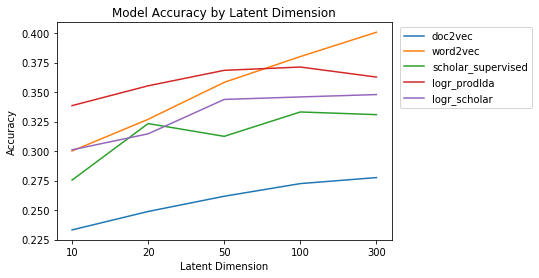

In [100]:
plt.title("Model Accuracy by Latent Dimension")
plt.ylabel("Accuracy")
plt.xlabel("Latent Dimension")
for model,vals in baseDict.items():
    dimAndAcc = []
    for latentDim, acc in vals.items():
        dimAndAcc.append((latentDim, acc))
    dimAndAcc = sorted(dimAndAcc, key=lambda tup: int(tup[0]))
    accs = [float(t[1]) for t in dimAndAcc]
    plt.plot(accs, label=model)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xticks(range(5), [10,20,50,100,300])

